<a href="https://colab.research.google.com/github/lilreel/EM-DAT-dataset-analytics/blob/main/disaster_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Dataset

[Link dataset](https://www.kaggle.com/datasets/jseebs/disaster-dataset)

## Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## Import Data

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/public_emdat_project.csv', encoding='latin-1')

In [ ]:
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,Djibouti,Sub-Saharan Africa,Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",NaN,NaN,Yes,No,No,1556.0,NaN,Km2,NaN,NaN,NaN,2001,6.0,NaN,2001,NaN,NaN,NaN,NaN,100000.0,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,Sudan,Northern Africa,Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",NaN,Food shortage|Water shortage,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,2000,1.0,NaN,2001,NaN,NaN,NaN,NaN,2000000.0,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,Somalia,Sub-Saharan Africa,Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",NaN,Food shortage,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,2000,1.0,NaN,2001,NaN,NaN,21.0,NaN,1200000.0,NaN,1200000.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,Angola,Sub-Saharan Africa,Africa,Calulo,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,26.0,2000,1.0,26.0,14.0,11.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,Angola,Sub-Saharan Africa,Africa,"Dombre Grande village (Baia Farta district, Be...",Heavy rain,NaN,No,No,Yes,NaN,47000.0,Km2,NaN,NaN,"Coporolo, Kwanza, Lucala",2000,1.0,8.0,2000,1.0,15.0,31.0,NaN,70000.0,NaN,70000.0,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25
5,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,Bangladesh,Southern Asia,Asia,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",NaN,NaN,No,No,No,NaN,6.4,°C,NaN,NaN,NaN,2000,1.0,NaN,2000,1.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
6,2000-0004-BRA,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,BRA,Brazil,Latin America and the Caribbean,Americas,Pouso Redondo (Etat de Santa Catarina),NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,12.0,2000,1.0,12.0,42.0,71.0,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
7,2000-0005-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,China,Eastern Asia,Asia,Fujian,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,1.0,2000,1.0,1.0,22.0,29.0,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2005-02-09,2023-09-25
8,2000-0006-CHN,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Hotel,CHN,China,Eastern Asia,Asia,Xiangtan (Hunan Province),NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,2000,1.0,9.0,2000,1.0,9.0,12.0,18.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
9,2000-0007-EGY,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,EGY,Egypt,Northern Africa,Africa,Al-Ayyat,NaN,NaN,No,No,No,NaN,NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     15784 non-null  object 
 1   Historic                                   15784 non-null  object 
 2   Classification Key                         15784 non-null  object 
 3   Disaster Group                             15784 non-null  object 
 4   Disaster Subgroup                          15784 non-null  object 
 5   Disaster Type                              15784 non-null  object 
 6   Disaster Subtype                           15784 non-null  object 
 7   External IDs                               2405 non-null   object 
 8   Event Name                                 4955 non-null   object 
 9   ISO                                        15784 non-null  object 
 10  Country               

## Data Cleaning

In [ ]:
# Drop kolom yang tidak diperlukan

df = df.drop(['DisNo.', 'Historic',	'Classification Key', 'External IDs', 'ISO', 'Location', 'OFDA/BHA Response',
              'Latitude', 'Longitude', 'River Basin', 'Total Affected', 'Admin Units', 'CPI',
              'Entry Date', 'Last Update', 'Start Month', 'Start Day', 'End Month', 'End Day'], axis=1)

In [ ]:
# Mengisi nilai kosong dengan '-' bagi kolom tipe data objek dan nilai 0 untuk kolom tipe data numerical

def fill_na_custom(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(0, inplace=True)
        elif pd.api.types.is_object_dtype(df[col]):
            df[col].fillna('-', inplace=True)
    return df

df = fill_na_custom(df)

<ipython-input-26-9498f84d24fd>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('-', inplace=True)
<ipython-input-26-9498f84d24fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

In [ ]:
# Mengubah tipe data

df['No. Injured'] = df['No. Injured'].astype(int)
df['No. Affected'] = df['No. Affected'].astype(int)
df['No. Homeless'] = df['No. Homeless'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Historic                                   15784 non-null  object 
 1   Disaster Group                             15784 non-null  object 
 2   Disaster Subgroup                          15784 non-null  object 
 3   Disaster Type                              15784 non-null  object 
 4   Disaster Subtype                           15784 non-null  object 
 5   Event Name                                 15784 non-null  object 
 6   Country                                    15784 non-null  object 
 7   Subregion                                  15784 non-null  object 
 8   Region                                     15784 non-null  object 
 9   Origin                                     15784 non-null  object 
 10  Associated Types      

In [ ]:
df.head()

,Historic,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,Subregion,Region,Origin,Associated Types,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Start Year,End Year,Total Deaths,No. Injured,No. Affected,No. Homeless,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
0,No,Natural,Climatological,Drought,Drought,-,Djibouti,Sub-Saharan Africa,Africa,-,-,No,No,1556.0,0.0,Km2,2001,2001,0.0,0,100000,0,0.0,0.0,0.0,0.0,0.0,0.0
1,No,Natural,Climatological,Drought,Drought,-,Sudan,Northern Africa,Africa,-,Food shortage|Water shortage,No,No,0.0,0.0,Km2,2000,2001,0.0,0,2000000,0,0.0,0.0,0.0,0.0,0.0,0.0
2,No,Natural,Climatological,Drought,Drought,-,Somalia,Sub-Saharan Africa,Africa,-,Food shortage,No,No,0.0,0.0,Km2,2000,2001,21.0,0,1200000,0,0.0,0.0,0.0,0.0,0.0,0.0
3,No,Technological,Transport,Road,Road,-,Angola,Sub-Saharan Africa,Africa,-,-,No,No,0.0,0.0,-,2000,2000,14.0,11,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,No,Natural,Hydrological,Flood,Riverine flood,-,Angola,Sub-Saharan Africa,Africa,Heavy rain,-,No,Yes,0.0,47000.0,Km2,2000,2000,31.0,0,70000,0,0.0,0.0,0.0,0.0,10000.0,17695.0
5,No,Natural,Meteorological,Extreme temperature,Cold wave,-,Bangladesh,Southern Asia,Asia,-,-,No,No,0.0,6.4,°C,2000,2000,49.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,No,Technological,Transport,Road,Road,-,Brazil,Latin America and the Caribbean,Americas,-,-,No,No,0.0,0.0,-,2000,2000,42.0,71,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,No,Technological,Transport,Road,Road,-,China,Eastern Asia,Asia,-,-,No,No,0.0,0.0,-,2000,2000,22.0,29,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,No,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),Hotel,China,Eastern Asia,Asia,-,-,No,No,0.0,0.0,-,2000,2000,12.0,18,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,No,Technological,Transport,Road,Road,-,Egypt,Northern Africa,Africa,-,-,No,No,0.0,0.0,-,2000,2000,21.0,19,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['Disaster Group'].value_counts()

,count
Disaster Group,
Natural,10045
Technological,5739


In [ ]:
# Value counts untuk mengecek jumlah nilai unik pada kolom

def value_counts_for_object_columns(df):
    for col in df.columns:
        if pd.api.types.is_object_dtype(df[col]):
            print(df[col].value_counts())
            print('-' * 40)

value_counts_for_object_columns(df)

Historic
No    15784
Name: count, dtype: int64
----------------------------------------
Disaster Group
Natural          10045
Technological     5739
Name: count, dtype: int64
----------------------------------------
Disaster Subgroup
Hydrological              4531
Transport                 3912
Meteorological            3067
Miscellaneous accident     924
Biological                 924
Industrial accident        903
Geophysical                804
Climatological             718
Extra-terrestrial            1
Name: count, dtype: int64
----------------------------------------
Disaster Type
Flood                               4070
Storm                               2575
Road                                2124
Water                               1111
Epidemic                             894
Earthquake                           665
Extreme temperature                  492
Mass movement (wet)                  461
Explosion (Industrial)               458
Air                                  

# EDA

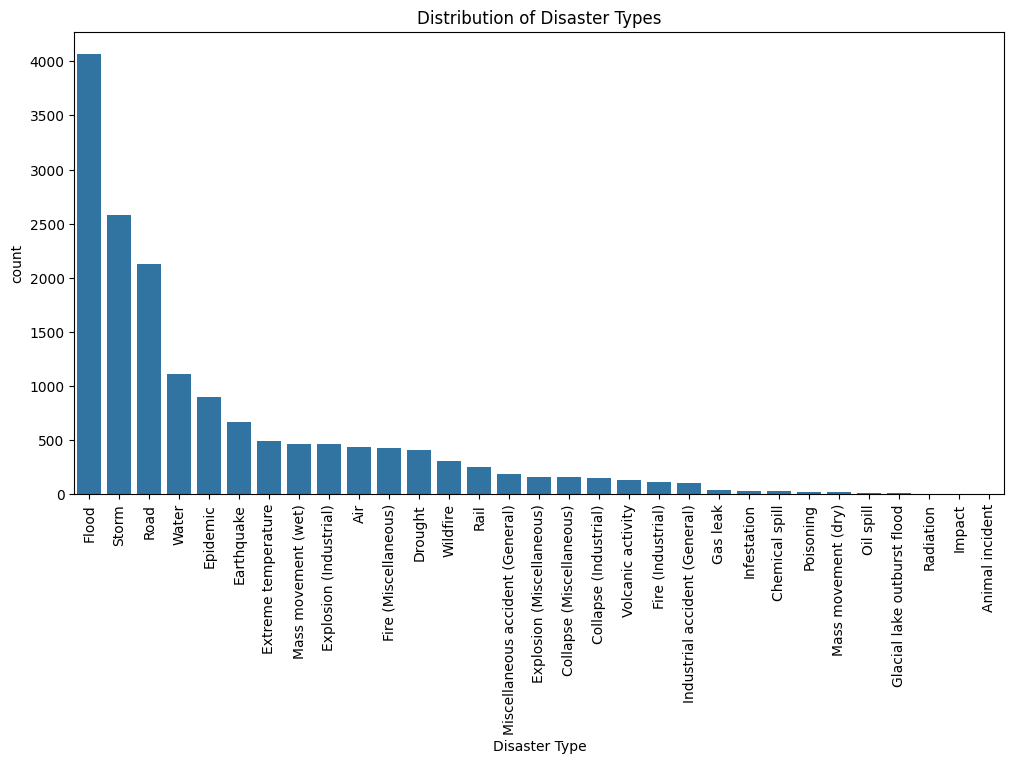

In [ ]:
# Distribusi tipe bencana berdasarkan jumlah kejadian terbanyak

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disaster Type', order=df['Disaster Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Disaster Types')
plt.show()

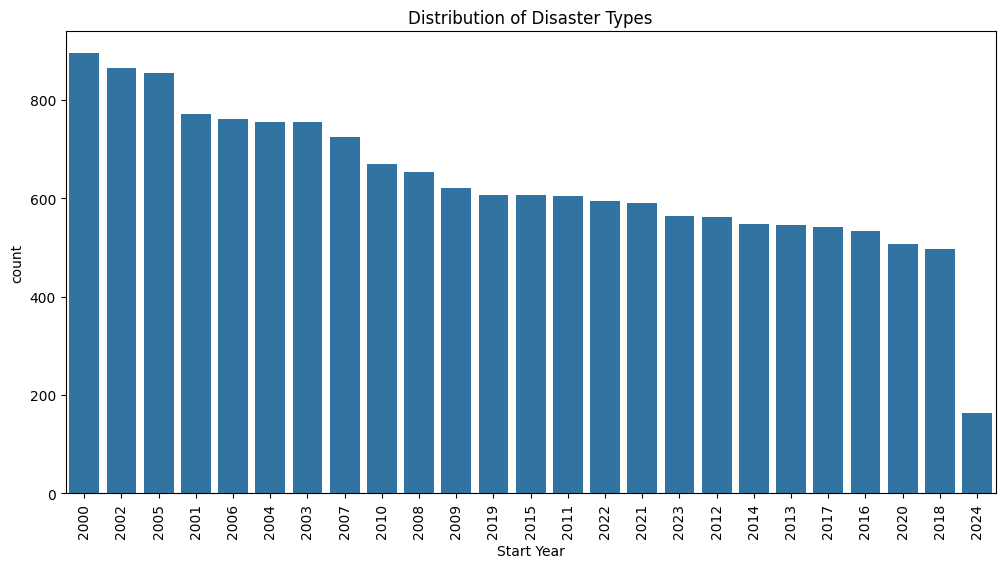

In [ ]:
# Distribusi tahun kejadian bencana berdasarkan jumlah kejadian terbanyak

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Start Year', order=df['Start Year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Disaster Types')
plt.show()

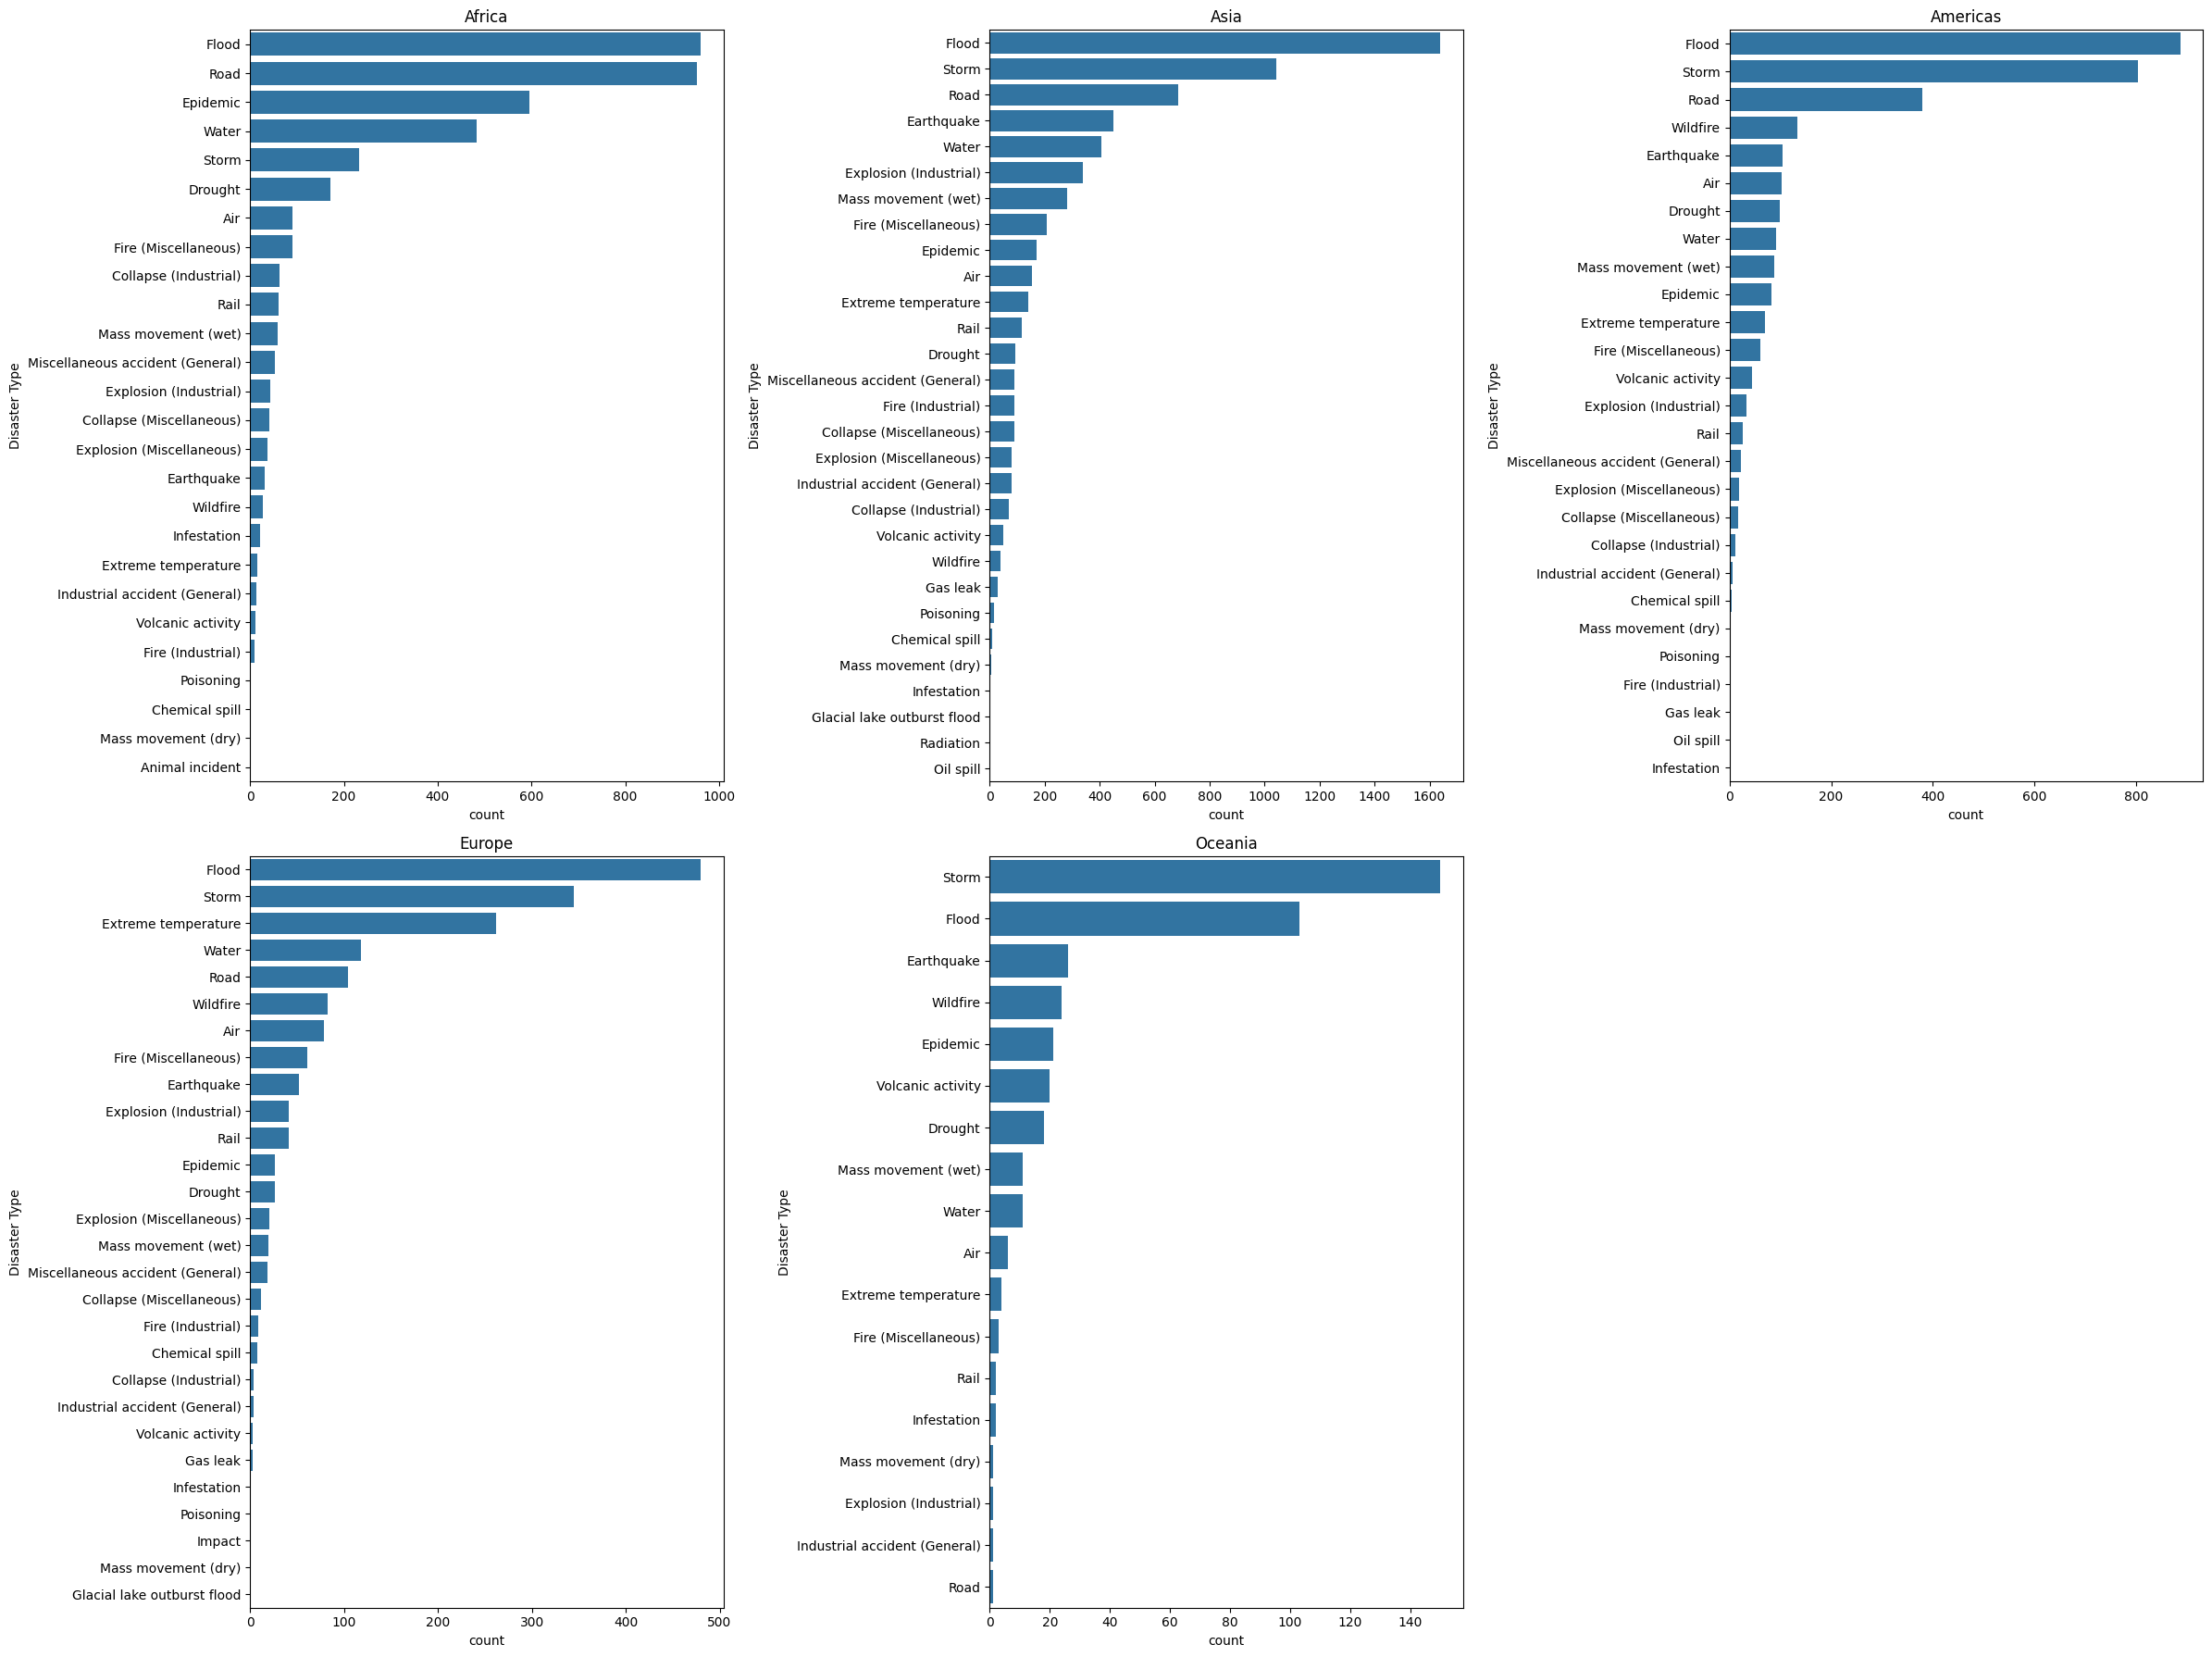

In [ ]:
# Distribusi tipe bencana berdasarkan benua

regions = df['Region'].unique()

# Hitung jumlah baris yang dibutuhkan berdasarkan jumlah subregion dan 3 subplot per baris
num_rows = (len(regions) + 2) // 3  # Mengurangi jumlah kolom menjadi 3 untuk ruang horizontal yang lebih banyak
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(24, 18))  # Meningkatkan ukuran gambar untuk ruang yang lebih banyak

# Rata-rata array axes jika itu 2D untuk menyederhanakan pengindeksan
axes = axes.flatten()

# Buat countplot untuk setiap subregion
for i, regions in enumerate(regions):
    # Filter DataFrame untuk subregion tertentu
    df_filtered = df[df['Region'] == regions]

    # Plot distribusi tipe bencana untuk setiap subregion menggunakan plot batang horizontal
    sns.countplot(data=df_filtered, y='Disaster Type', ax=axes[i], order=df_filtered['Disaster Type'].value_counts().index)

    # Set judul
    axes[i].set_title(f'{regions}')

# Sembunyikan subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Sesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

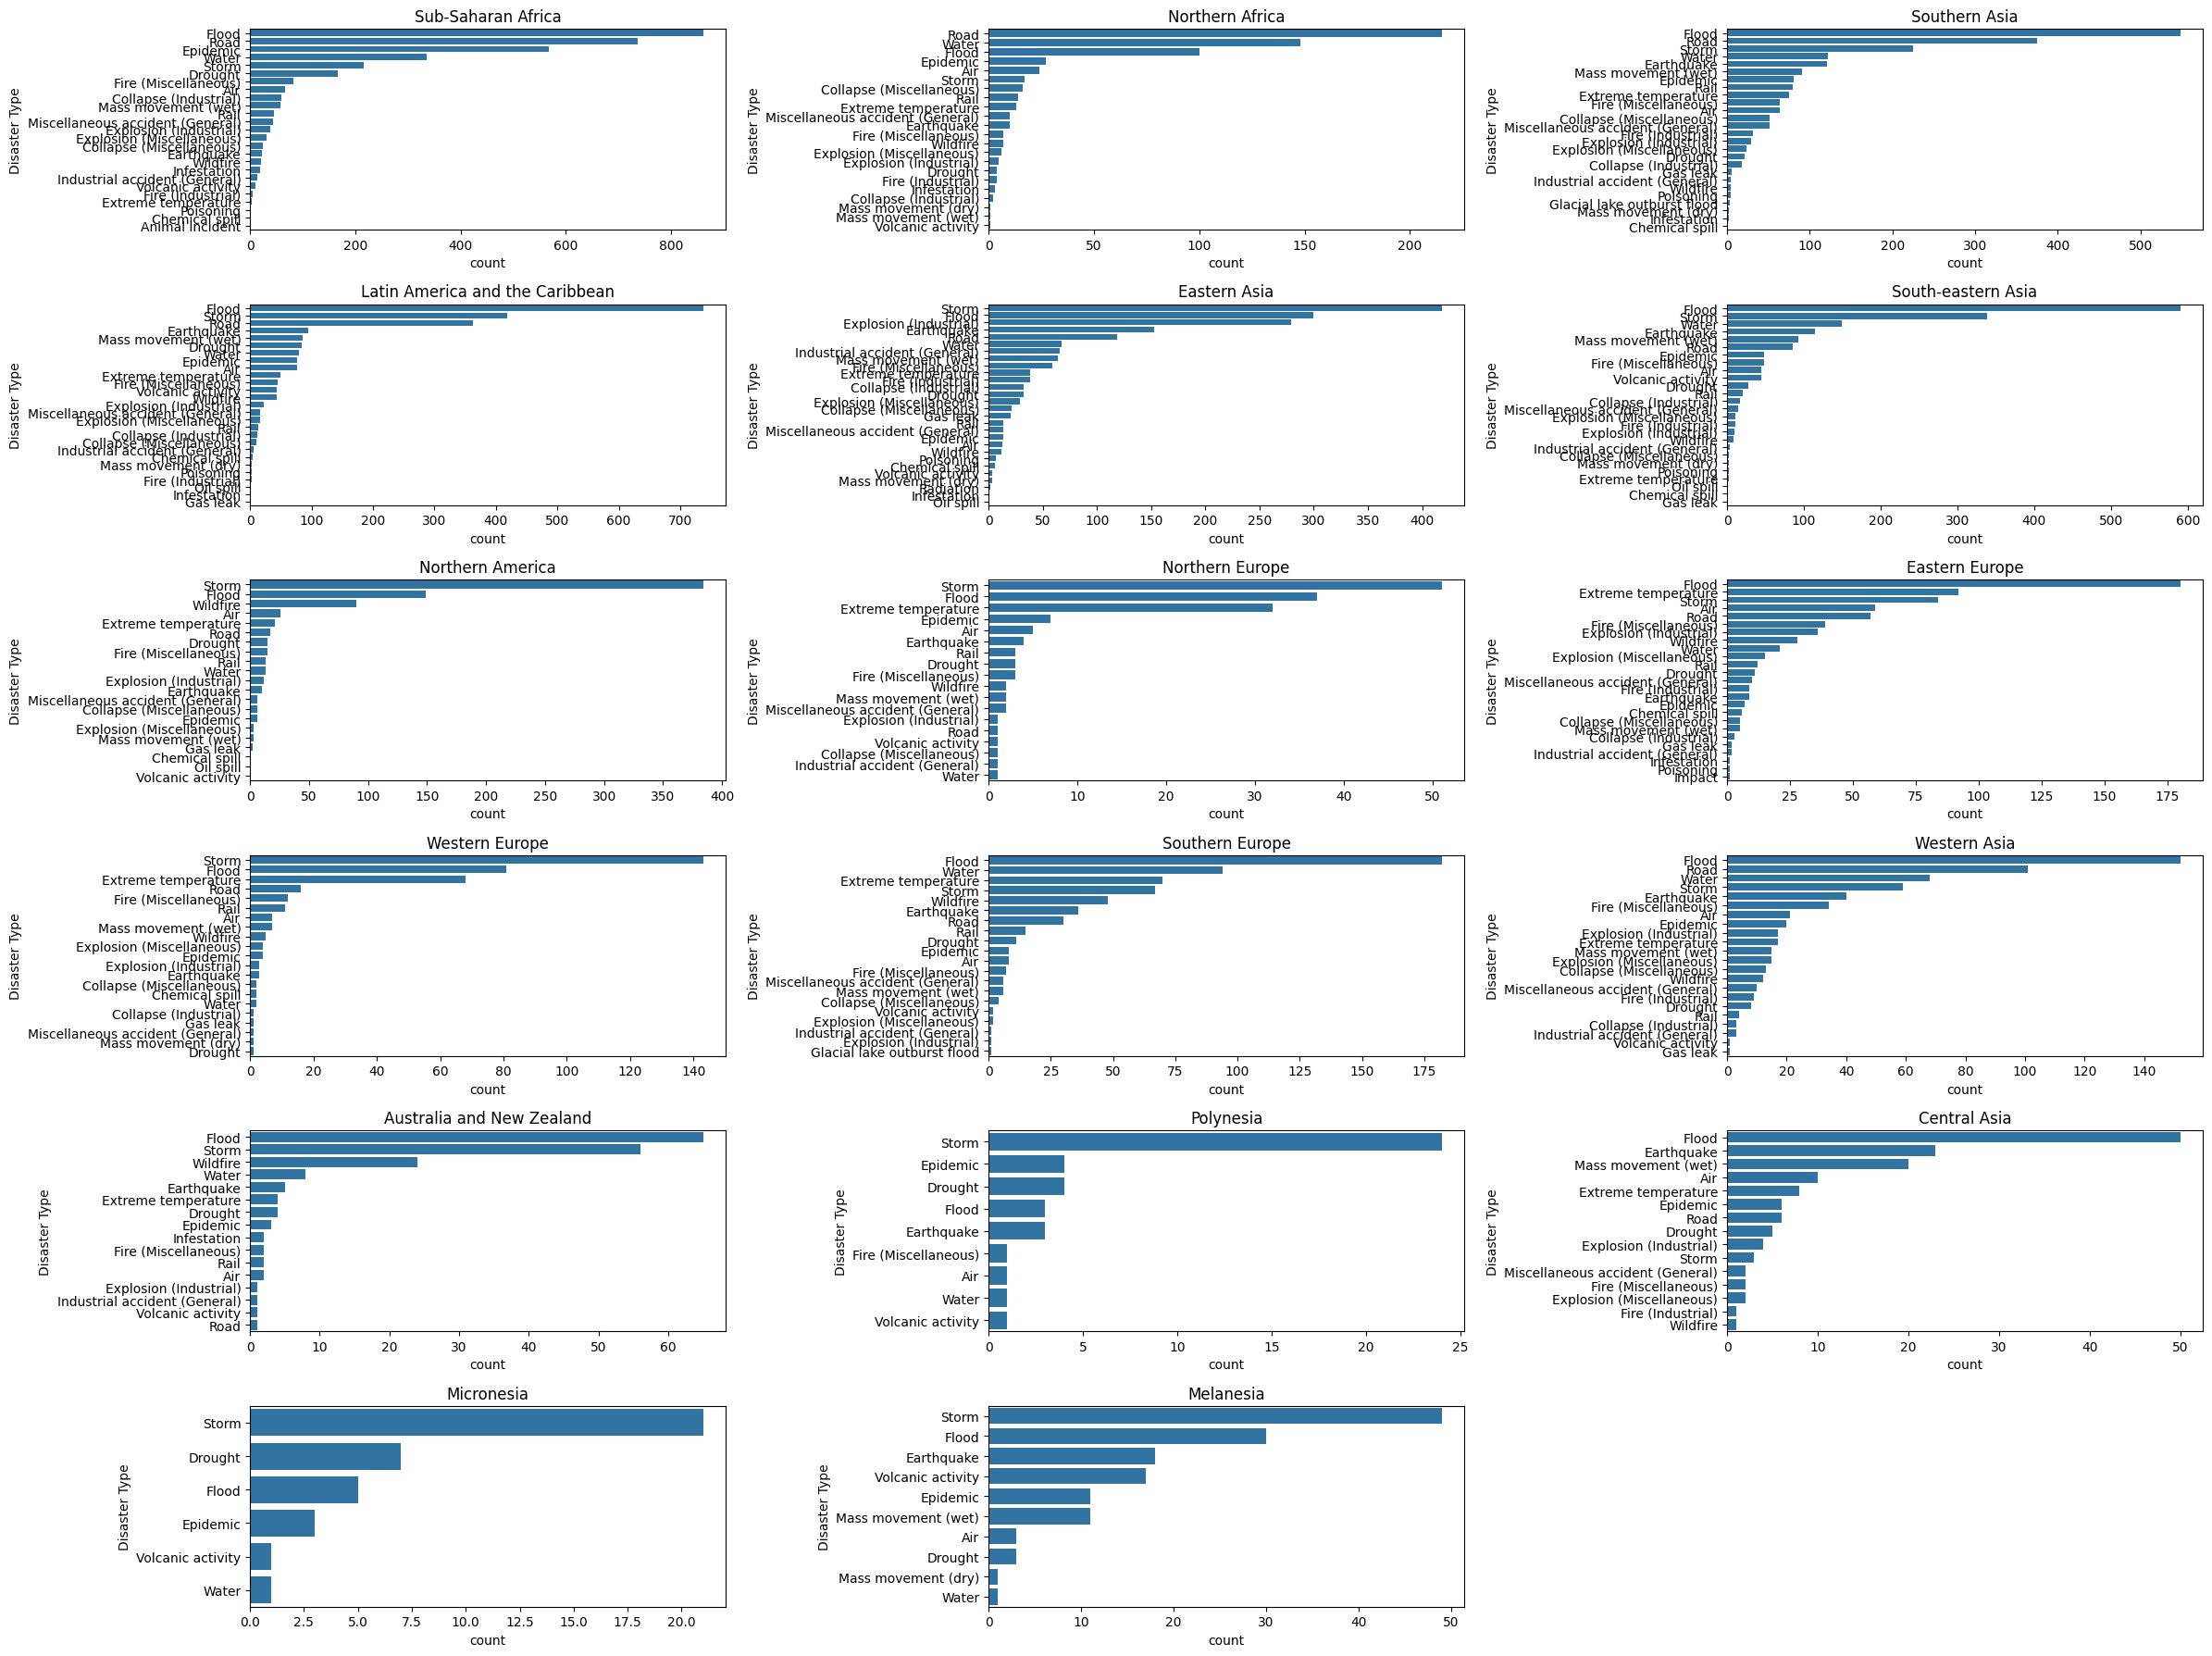

In [ ]:
# Distribusi tipe bencana berdasarkan Sub-benua

subregions = df['Subregion'].unique()

# Hitung jumlah baris yang dibutuhkan berdasarkan jumlah subregion dan 3 subplot per baris
num_rows = (len(subregions) + 2) // 3  # Mengurangi jumlah kolom menjadi 3 untuk ruang horizontal yang lebih banyak
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(24, 18))  # Meningkatkan ukuran gambar untuk ruang yang lebih banyak

# Rata-rata array axes jika itu 2D untuk menyederhanakan pengindeksan
axes = axes.flatten()

# Buat countplot untuk setiap subregion
for i, subregion in enumerate(subregions):
    # Filter DataFrame untuk subregion tertentu
    df_filtered = df[df['Subregion'] == subregion]

    # Plot distribusi tipe bencana untuk setiap subregion menggunakan plot batang horizontal
    sns.countplot(data=df_filtered, y='Disaster Type', ax=axes[i], order=df_filtered['Disaster Type'].value_counts().index)

    # Set judul
    axes[i].set_title(f'{subregion}')

# Sembunyikan subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Sesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

In [ ]:
df.sort_values(by='Total Damage, Adjusted (\'000 US$)', ascending=False)

,Historic,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,Subregion,Region,Origin,Associated Types,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Start Year,End Year,Total Deaths,No. Injured,No. Affected,No. Homeless,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
8403,No,Natural,Geophysical,Earthquake,Tsunami,-,Japan,Eastern Asia,Asia,-,Fire|Industrial accidents,No,No,735797.0,9.1,Richter,2011,2011,19846.0,5933,362887,0,0.0,0.0,37500000.0,50797348.0,210000000.0,284465151.0
4509,No,Natural,Meteorological,Storm,Tropical cyclone,Katrina,United States of America,Northern America,Americas,-,Broken Dam/Burst bank|Flood,No,Yes,0.0,280.0,Kph,2005,2005,1833.0,0,500000,0,0.0,0.0,60000000.0,93614347.0,125000000.0,195029889.0
6558,No,Natural,Geophysical,Earthquake,Ground movement,-,China,Eastern Asia,Asia,-,"Slide (land, mud, snow, rock)",No,No,303663.0,7.9,Richter,2008,2008,87476.0,366596,45610000,0,10000000.0,14152261.0,300000.0,424568.0,85000000.0,120294216.0
12019,No,Natural,Meteorological,Storm,Tropical cyclone,Hurricane Harvey,United States of America,Northern America,Americas,-,Flood|Oil spill,No,Yes,0.0,215.0,Kph,2017,2017,88.0,24,555000,27000,0.0,0.0,30000000.0,37292199.0,95000000.0,118091963.0
14876,No,Natural,Meteorological,Storm,Tropical cyclone,Hurricane 'Ian',United States of America,Northern America,Americas,-,Flood,No,Yes,0.0,240.0,Kph,2022,2022,152.0,0,0,0,0.0,0.0,60000000.0,62469844.0,100000000.0,104116407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744,No,Technological,Transport,Road,Road,-,South Africa,Sub-Saharan Africa,Africa,-,-,No,No,0.0,0.0,-,2007,2007,17.0,45,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5745,No,Technological,Transport,Water,Water,-,India,Southern Asia,Asia,-,-,No,No,0.0,0.0,-,2007,2007,38.0,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5746,No,Natural,Meteorological,Storm,Tropical cyclone,Favio,Mozambique,Sub-Saharan Africa,Africa,-,-,No,No,0.0,180.0,Kph,2007,2007,10.0,70,162700,0,0.0,0.0,0.0,0.0,0.0,0.0
5748,No,Technological,Transport,Road,Road,-,Colombia,Latin America and the Caribbean,Americas,-,-,No,No,0.0,0.0,-,2007,2007,15.0,27,0,0,0.0,0.0,0.0,0.0,0.0,0.0


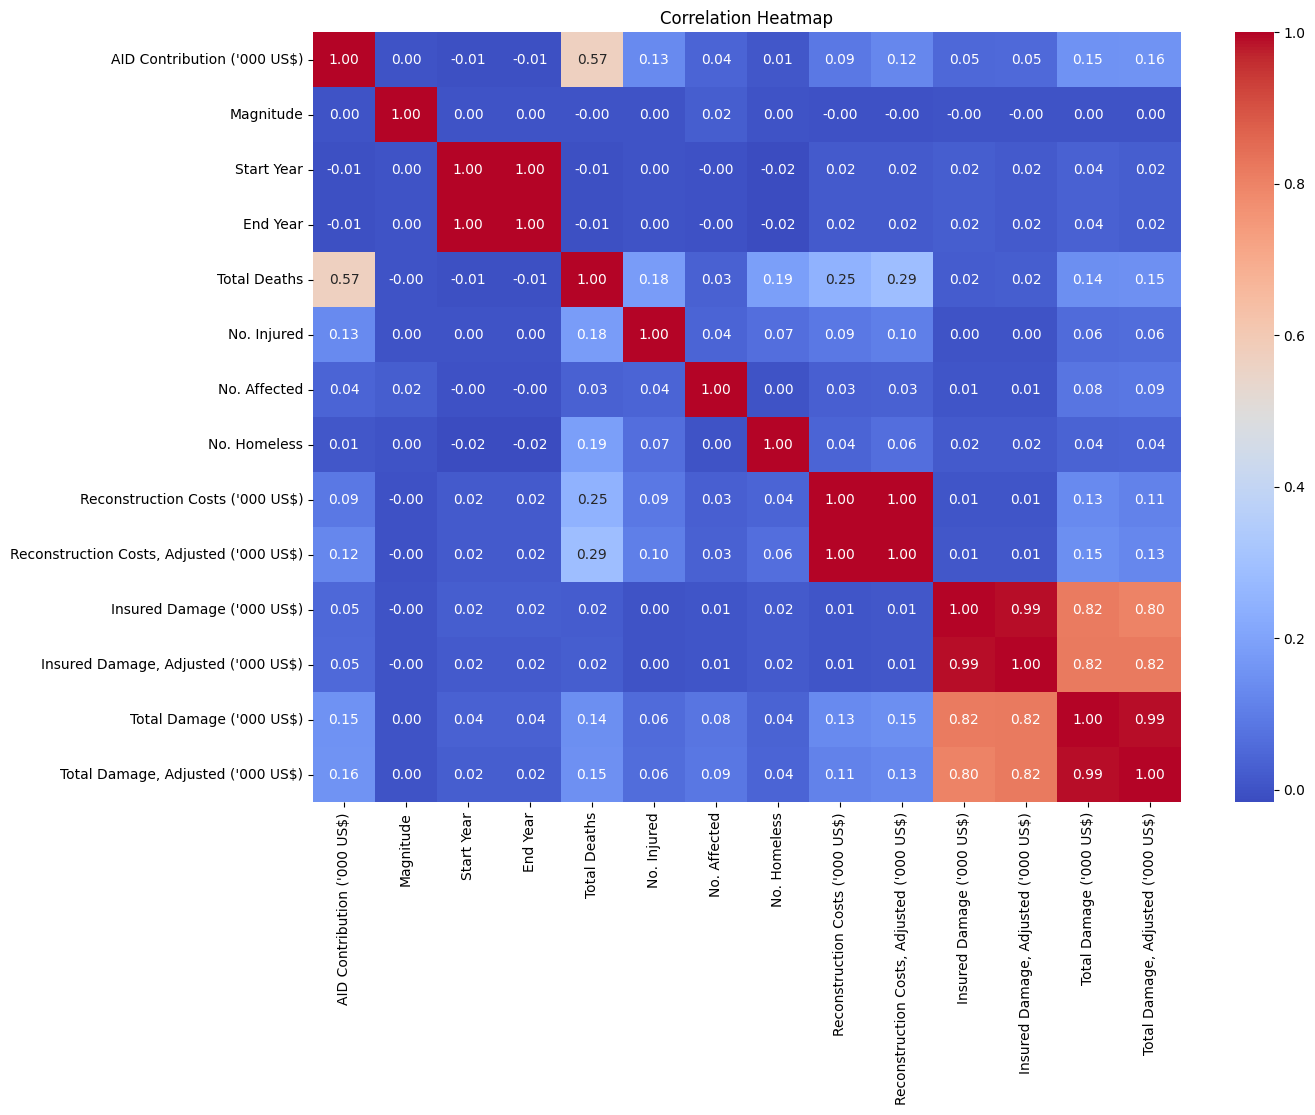

In [ ]:
#Korelasi

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()